In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from pandas.tseries.offsets import BDay
import plotly.graph_objects as go

### Load Data

In [2]:
snp = yf.Ticker("^GSPC")
nvidia = yf.Ticker("NVDA")

In [3]:
snp.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5235.48,
 'open': 5243.21,
 'dayLow': 5191.68,
 'dayHigh': 5280.33,
 'regularMarketPreviousClose': 5235.48,
 'regularMarketOpen': 5243.21,
 'regularMarketDayLow': 5191.68,
 'regularMarketDayHigh': 5280.33,
 'volume': 3930922000,
 'regularMarketVolume': 3930922000,
 'averageVolume': 3970607777,
 'averageVolume10days': 3794282000,
 'averageDailyVolume10Day': 3794282000,
 'bid': 5224.07,
 'ask': 5328.88,
 'fiftyTwoWeekLow': 4103.78,
 'fiftyTwoWeekHigh': 5341.88,
 'fiftyDayAverage': 5181.0024,
 'twoHundredDayAverage': 4773.8457,
 'currency': 'USD',
 'exchange': 'SNP',
 'quoteType': 'INDEX',
 'symbol': '^GSPC',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500',
 'longName': 'S&P 500',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '8ffd55d1-3d1d-3733-a480-56768bc708e6',
 'messageBoardId': 'finmb_INDEXGSPC',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio':

In [4]:
nvidia.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

In [5]:
nvidia_hist = nvidia.history(period="10y")
snp_hist = snp.history(period="10y")

In [6]:
nvidia_hist_last7 = nvidia_hist.iloc[-7:]
nvidia_hist_last30 = nvidia_hist.iloc[-30:]
nvidia_hist_last200 = nvidia_hist.iloc[-200:]

In [7]:
last_prc_rec = nvidia_hist.iloc[-1:]
last_prc_rec

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-31 00:00:00-04:00,1125.199951,1127.170044,1069.400024,1096.329956,61183200,0.0,0.0


In [8]:
last_prc_rec.Close

Date
2024-05-31 00:00:00-04:00    1096.329956
Name: Close, dtype: float64

In [9]:
print(nvidia_hist.columns)
print(nvidia_hist.index[0])

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
2014-06-02 00:00:00-04:00


In [10]:
nvidia_hist["Date2"] = nvidia_hist.index.date
nvidia_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2
Date,,,,,,,,
2014-06-02 00:00:00-04:00,4.536356,4.564916,4.469715,4.507795,18150000,0.0,0.0,2014-06-02
2014-06-03 00:00:00-04:00,4.517314,4.522075,4.429253,4.488754,24321200,0.0,0.0,2014-06-03
2014-06-04 00:00:00-04:00,4.476855,4.526836,4.474475,4.493515,16123600,0.0,0.0,2014-06-04
2014-06-05 00:00:00-04:00,4.500654,4.526835,4.474474,4.512554,18869600,0.0,0.0,2014-06-05
2014-06-06 00:00:00-04:00,4.533976,4.569677,4.517315,4.529216,16105200,0.0,0.0,2014-06-06


In [11]:
nvidia_hist[nvidia_hist['Date2'].astype(str) == '2023-05-12']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2
Date,,,,,,,,
2023-05-12 00:00:00-04:00,285.198521,287.707695,280.370053,283.309113,27402700,0.0,0.0,2023-05-12


In [12]:
nvidia_hist[nvidia_hist['Date2'].astype(str).str[:10] == '2023-05-07']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2
Date,,,,,,,,


In [13]:
nvidia_hist["Date"] = nvidia_hist.index.normalize()
nvidia_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2,Date
Date,,,,,,,,,
2014-06-02 00:00:00-04:00,4.536356,4.564916,4.469715,4.507795,18150000,0.0,0.0,2014-06-02,2014-06-02 00:00:00-04:00
2014-06-03 00:00:00-04:00,4.517314,4.522075,4.429253,4.488754,24321200,0.0,0.0,2014-06-03,2014-06-03 00:00:00-04:00
2014-06-04 00:00:00-04:00,4.476855,4.526836,4.474475,4.493515,16123600,0.0,0.0,2014-06-04,2014-06-04 00:00:00-04:00
2014-06-05 00:00:00-04:00,4.500654,4.526835,4.474474,4.512554,18869600,0.0,0.0,2014-06-05,2014-06-05 00:00:00-04:00
2014-06-06 00:00:00-04:00,4.533976,4.569677,4.517315,4.529216,16105200,0.0,0.0,2014-06-06,2014-06-06 00:00:00-04:00


In [14]:
nvidia_hist["date"] = nvidia_hist.index.date
nvidia_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-06-02 00:00:00-04:00 to 2024-05-31 00:00:00-04:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Open          2518 non-null   float64                         
 1   High          2518 non-null   float64                         
 2   Low           2518 non-null   float64                         
 3   Close         2518 non-null   float64                         
 4   Volume        2518 non-null   int64                           
 5   Dividends     2518 non-null   float64                         
 6   Stock Splits  2518 non-null   float64                         
 7   Date2         2518 non-null   object                          
 8   Date          2518 non-null   datetime64[ns, America/New_York]
 9   date          2518 non-null   object                          
dtypes: datetime64[ns, Americ

In [15]:
nvidia_hist["date"] = pd.to_datetime(nvidia_hist.index).date
nvidia_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-06-02 00:00:00-04:00 to 2024-05-31 00:00:00-04:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Open          2518 non-null   float64                         
 1   High          2518 non-null   float64                         
 2   Low           2518 non-null   float64                         
 3   Close         2518 non-null   float64                         
 4   Volume        2518 non-null   int64                           
 5   Dividends     2518 non-null   float64                         
 6   Stock Splits  2518 non-null   float64                         
 7   Date2         2518 non-null   object                          
 8   Date          2518 non-null   datetime64[ns, America/New_York]
 9   date          2518 non-null   object                          
dtypes: datetime64[ns, Americ

In [16]:
def remove_timezone(dt):
   return dt.replace(tzinfo=None)

In [17]:
last_day_prior_year = '2023-12-29'
last_day_prior_month = '2024-05-31'

In [18]:
nvidia_hist['Date'] = nvidia_hist['Date'].apply(remove_timezone)
rec_last_day_prior_year = nvidia_hist.query("Date == @last_day_prior_year")
rec_last_day_prior_year

C:\Users\wrjod\AppData\Local\Temp\ipykernel_8\3222920497.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  rec_last_day_prior_year = nvidia_hist.query("Date == @last_day_prior_year")


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2,Date,date
Date,,,,,,,,,,
2023-12-29 00:00:00-05:00,498.106645,499.946555,487.487147,495.196777,38869000,0.0,0.0,2023-12-29,2023-12-29,2023-12-29


In [19]:
last_prc = last_prc_rec.Close.values[0]
todays_close = last_prc_rec["Close"].values[0]
prior_year_close = rec_last_day_prior_year["Close"].values[0]
ytd_diff = todays_close - prior_year_close
ytd_pct_chg = ytd_diff / prior_year_close
print(f"Close={todays_close}, EOY={prior_year_close}, Diff={ytd_diff}, Pct_Chg={ytd_pct_chg}")

Close=1096.3299560546875, EOY=495.19677734375, Diff=601.1331787109375, Pct_Chg=1.2139278893037904


In [20]:
ytd_price_chg = todays_close - prior_year_close
ytd_return = ytd_price_chg/prior_year_close

ytd_return

1.2139278893037904

In [21]:
print(f"{last_prc_rec.Close}, {rec_last_day_prior_year.Close}, {ytd_price_chg}, {ytd_return}")

Date
2024-05-31 00:00:00-04:00    1096.329956
Name: Close, dtype: float64, Date
2023-12-29 00:00:00-05:00    495.196777
Name: Close, dtype: float64, 601.1331787109375, 1.2139278893037904


In [22]:
nvidia_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-06-02 00:00:00-04:00 to 2024-05-31 00:00:00-04:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          2518 non-null   float64       
 1   High          2518 non-null   float64       
 2   Low           2518 non-null   float64       
 3   Close         2518 non-null   float64       
 4   Volume        2518 non-null   int64         
 5   Dividends     2518 non-null   float64       
 6   Stock Splits  2518 non-null   float64       
 7   Date2         2518 non-null   object        
 8   Date          2518 non-null   datetime64[ns]
 9   date          2518 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 216.4+ KB


In [23]:
nvidia_hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2,Date,date
Date,,,,,,,,,,
2024-05-24 00:00:00-04:00,1044.489990,1064.750000,1030.000000,1064.689941,42650200,0.0,0.0,2024-05-24,2024-05-24,2024-05-24
2024-05-28 00:00:00-04:00,1102.439941,1149.390015,1098.829956,1139.010010,65272800,0.0,0.0,2024-05-28,2024-05-28,2024-05-28
2024-05-29 00:00:00-04:00,1130.500000,1154.920044,1109.010010,1148.250000,55744200,0.0,0.0,2024-05-29,2024-05-29,2024-05-29
2024-05-30 00:00:00-04:00,1146.500000,1158.189941,1096.630005,1105.000000,48735000,0.0,0.0,2024-05-30,2024-05-30,2024-05-30
2024-05-31 00:00:00-04:00,1125.199951,1127.170044,1069.400024,1096.329956,61183200,0.0,0.0,2024-05-31,2024-05-31,2024-05-31


In [24]:
nvidia_hist.query("Open >= 380")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2,Date,date
Date,,,,,,,,,,
2023-05-25 00:00:00-04:00,385.106474,394.673382,366.232524,379.678192,154391100,0.0,0.0,2023-05-25,2023-05-25,2023-05-25
2023-05-30 00:00:00-04:00,405.819859,419.245546,399.361909,400.981384,92340100,0.0,0.0,2023-05-30,2023-05-30,2023-05-30
2023-05-31 00:00:00-04:00,394.753394,402.820814,378.098732,378.218689,100258000,0.0,0.0,2023-05-31,2023-05-31,2023-05-31
2023-06-01 00:00:00-04:00,384.766619,400.371600,383.277076,397.572510,63587300,0.0,0.0,2023-06-01,2023-06-01,2023-06-01
2023-06-02 00:00:00-04:00,400.841465,404.870172,390.454781,393.143921,48165500,0.0,0.0,2023-06-02,2023-06-02,2023-06-02
...,...,...,...,...,...,...,...,...,...,...
2024-05-24 00:00:00-04:00,1044.489990,1064.750000,1030.000000,1064.689941,42650200,0.0,0.0,2024-05-24,2024-05-24,2024-05-24
2024-05-28 00:00:00-04:00,1102.439941,1149.390015,1098.829956,1139.010010,65272800,0.0,0.0,2024-05-28,2024-05-28,2024-05-28
2024-05-29 00:00:00-04:00,1130.500000,1154.920044,1109.010010,1148.250000,55744200,0.0,0.0,2024-05-29,2024-05-29,2024-05-29


In [25]:
last_day_of_year = nvidia_hist.loc['2023-12-29':'2023-12-29']
last_day_of_year

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2,Date,date
Date,,,,,,,,,,
2023-12-29 00:00:00-05:00,498.106645,499.946555,487.487147,495.196777,38869000,0.0,0.0,2023-12-29,2023-12-29,2023-12-29


In [26]:
today = datetime.today()
print(today - BDay(1))
last_biz_date = (today - BDay(1)).to_pydatetime().date()
print(type(last_biz_date))
nvidia_hist.query("Date == @last_biz_date").Close

2024-05-31 20:47:12.858018
<class 'datetime.date'>


Date
2024-05-31 00:00:00-04:00    1096.329956
Name: Close, dtype: float64

### 5 year return

In [27]:
days_back = 252 * 5
biz_date_5yrs = (today - BDay(days_back)).to_pydatetime().date()
nvidia_hist.query("Date == @biz_date_5yrs").Close

Date
2019-08-05 00:00:00-04:00    37.484211
Name: Close, dtype: float64

In [28]:
result_query = nvidia_hist.query("Date == '2024-12-30'").Close #.values[0]
result_query

C:\Users\wrjod\AppData\Local\Temp\ipykernel_8\2630929191.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  result_query = nvidia_hist.query("Date == '2024-12-30'").Close #.values[0]


Series([], Name: Close, dtype: float64)

In [29]:
result_query = nvidia_hist.query("Date == '2023-12-29'")
result_query

C:\Users\wrjod\AppData\Local\Temp\ipykernel_8\3165507215.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  result_query = nvidia_hist.query("Date == '2023-12-29'")


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date2,Date,date
Date,,,,,,,,,,
2023-12-29 00:00:00-05:00,498.106645,499.946555,487.487147,495.196777,38869000,0.0,0.0,2023-12-29,2023-12-29,2023-12-29


In [30]:
df_date = pd.DataFrame({'Date': ['2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29', '2024-01-01']})
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
dtypes: object(1)
memory usage: 172.0+ bytes


In [31]:
df_date['Date'] = pd.to_datetime(df_date['Date'])
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 172.0 bytes


In [32]:
result_query = df_date.query("Date > '2023-12-29'")
result_query.head()

,Date
4,2024-01-01


In [33]:
last_day_of_year.Close

Date
2023-12-29 00:00:00-05:00    495.196777
Name: Close, dtype: float64

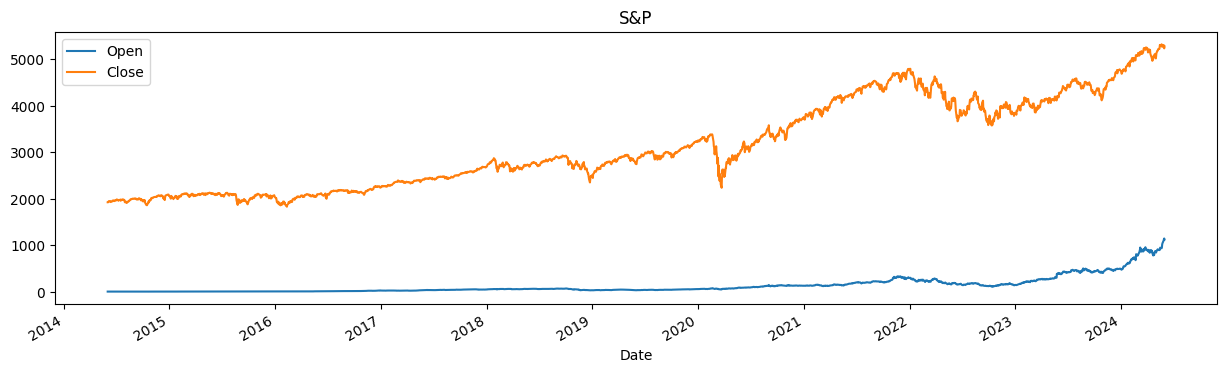

In [34]:
nvidia_hist['Open'].plot(figsize=(15,4), title=f"NVDA")
snp_hist['Close'].plot(figsize=(15,4), title=f"S&P")
plt.legend()
plt.show()

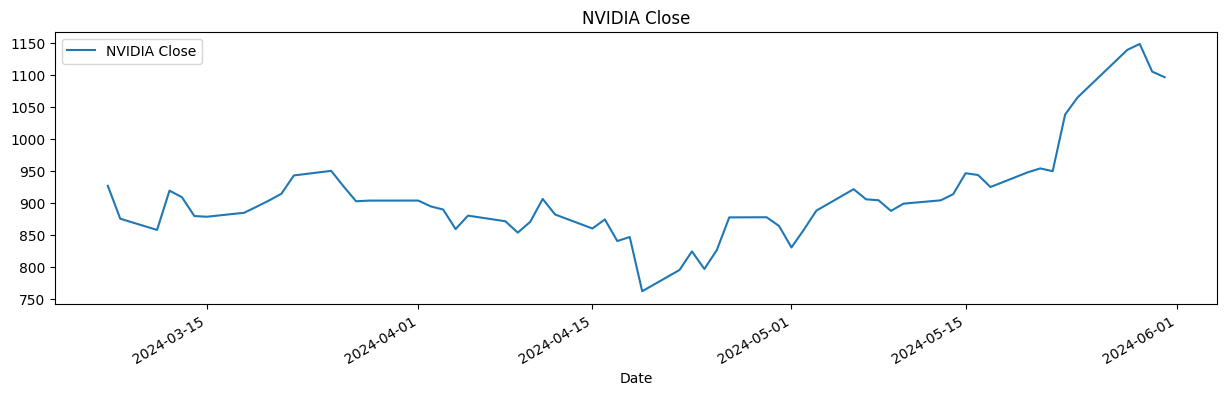

In [35]:
nvidia_hist.tail(60)['Close'].plot(figsize=(15,4), title=f"NVIDIA Close", label='NVIDIA Close')
plt.legend()

<Axes: xlabel='Date'>

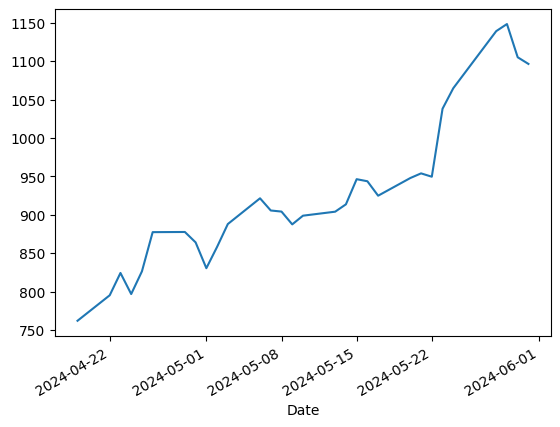

In [36]:
nvidia_hist_last30.Close.plot()

In [37]:
ohlc = go.Figure(data = [go.Ohlc(x=nvidia_hist_last30.index, 
                                               open = nvidia_hist_last7[('Open')], 
                                               high = nvidia_hist_last7[('High')], 
                                               low = nvidia_hist_last7[('Low')], 
                                               close = nvidia_hist_last7[('Close')])])
ohlc.update_xaxes(title_text = 'Time',
                             rangeslider_visible = False)

In [38]:
stock = yf.Ticker("NVDA")

def show_stock_info(stock:yf.ticker.Ticker) -> None:
    
    print(f"52wk Change: {stock.info['52WeekChange']*100:.2f}%")
    print(f"PEG: {stock.info['pegRatio']}")
    print(f"Trailing PEG: {stock.info['trailingPegRatio']:.2f}")
    print(f"Forward PE: {stock.info['forwardPE']:.2f}")
    print(f"Trailing PE: {stock.info['trailingPE']:.2f}")
    print(f"Short Ratio: {stock.info['shortRatio']:.2f}")

show_stock_info(stock)

52wk Change: 179.88%
PEG: 0.88
Trailing PEG: 1.37
Forward PE: 30.74
Trailing PE: 64.11
Short Ratio: 0.64


In [39]:
nvidia_hist.to_csv('dataset/nvidia_data.csv')

: 